# Coursework 1

Please enter your name and student number into the Markdown cell below.

#### Name: Khalfan Khalfan
#### Student Number: 10187477

This piece of coursework will test you on what you have learnt in the first half of the course. As with the formative coursework, the marks available are indicated for each question. Input your answers into the code and markdown cells provided.

Your coursework will be marked using the same version of Python as is available in the Simon building computer cluster. It is your responsibility to ensure that your code works in this version of Python. If your code does not run correctly due to incompatibility issues between the version of Python you used and the version that is used to mark your coursework, you will not get the marks! Therefore, it is recommended that you test your code in the Simon building cluster before you submit.

In this piece of coursework, we are going to model the oscillations of a damped spring (which might be used in a car's suspension, for example) which is subjected to a time-varying forcing (which could be caused by the driver's pattern of acceleration and braking and the associated interacation of the car with the road's surface). This problem can be modelled by the following differential equation:

$$\frac{d^2u(t)}{dt^2}+D\frac{du(t)}{dt}+Su(t)=f(t),$$

where $u(t)$ is the displacement of the spring in mm at time $t$ seconds, $D$ is a constant associated with the spring's damping, $S$ is a constant associated with its stiffness and $f(t)$ is a function that represents the time-varying forcing. The specific form of $f(t)$ you will be asked to use will be generated based on your student ID number (this should be something like 9023839). Please enter it into the code below after the equals sign on the first row, then run the code. You will then see a printed message telling you what form of $f(t)$ to use for the rest of the coursework. It is essential that you enter the correct student ID number, otherwise you may be accused of plagiarism.

In [1]:
ID=10187477 #EDIT THIS LINE ONLY TO ENTER YOUR ID NUMBER, THEN INPUT THE CELL

Ta,Tb,Tc,Td,Te=0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
print('For the rest of this coursework, please use f(t) =',Ta,'t^4 -',Tb,'t^3 +',Tc,'t^2 -',Td,'t +',Te)
del Ta,Tb,Tc,Td,Te

For the rest of this coursework, please use f(t) = 0.003 t^4 - 0.05 t^3 + 0.6 t^2 - 4 t + 0


In the message above, the symbol <code>^</code> means "to the power of"; so, for example <code>t^3</code> represents $t^3$. Later, we will be using your student ID to generate other pieces of information (such as initial and boundary conditions), so please don't create any new variables called <code>ID</code>! Other temporary variables introduced throughout this coursework begin with a captical <code>T</code> such <code>Ta</code>, <code>TD</code> and <code>Ta1</code>, so to be safe, do not create any new variables that begin with a <code>T</code> and __do not edit any of the code provided__.

As a final tip, __make sure that you report all quantities to an appropriate number of significant figures and include the correct units in all of your answers and axes labels__. You will lose marks if these are incorrect or omitted.

#### <span style="color: red"> Task 1:</span> Solve the governing equation to determine the spring's displacement $u(t)$ using the Euler Forward Method <span style="color: red"> (11 marks)</span>

We will assume that we know the displacement $u_0$ and rate of change of displacement $v_0$ at time

$$u(0)=u_0,\hspace{0.5cm}\text{and}\hspace{0.5cm}u'(0)=v_0.$$

The numerical values of $D$, $S$, $u_0$ and $v_0$ you should use are determined using your student ID number by the code below.

In [2]:
TD,TS,Tu0,Tv0=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10
print('Please use D =',TD,', S =',TS,', u0 =',Tu0,'and v0 =',Tv0)
del TD,TS,Tu0,Tv0

Please use D = 0.1 , S = 1.8 , u0 = 77 and v0 = 1.1


Compare your numerical solution to the exact solution, which for your $f(t)$ is generated by the code below, by plotting them both on the same set of axes.

In [3]:
TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10,0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8=TD/2,((-TD**2+4*TS)**0.5)/2,Ta/TS,-Tb/TS-4*Ta*TD/TS**2,Tc/TS+3*Tb*TD/TS**2+12*Ta*TD**2/TS**3-12*Ta/TS**2,-Td/TS+6*Tb/TS**2+48*Ta*TD/TS**3-2*Tc*TD/TS**2-6*Tb*TD**2/TS**3-24*Ta*TD**3/TS**4,Te/TS-2*Tc/TS**2-12*Tb*TD/TS**3-72*Ta*TD**2/TS**4+Td*TD/TS**2+24*Ta/TS**3+2*Tc*TD**2/TS**3+6*Tb*TD**3/TS**4+24*Ta*TD**4/TS**5
TA,TB=Tu0-Ta8,(Tv0+Ta1*Tu0-Ta1*Ta8-Ta7)/Ta2
print('The exact solution to compare to is u(t) = e^(-',"%.3g" % Ta1,'t)(',"%.3g" % TA, 'cos(', "%.3g" % Ta2,'t)+',"%.3g" % TB, ' sin(',"%.3g" % Ta2,'t))',"%+.3g" % Ta4,'t^4',"%+.3g" % Ta5,'t^3',"+%.3g" % Ta6,'t^2',"%+.3g" % Ta7,'t',"%+.3g" % Ta8)
del TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te,Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8

The exact solution to compare to is u(t) = e^(- 0.05 t)( 77.2 cos( 1.34 t)+ 5.32  sin( 1.34 t)) +0.00167 t^4 -0.0281 t^3 +0.327 t^2 -2.16 t -0.243


Discretise the domain into 1000 pieces and enter your answer into the code cell below. Calculate and plot the solution over a period of ten seconds.

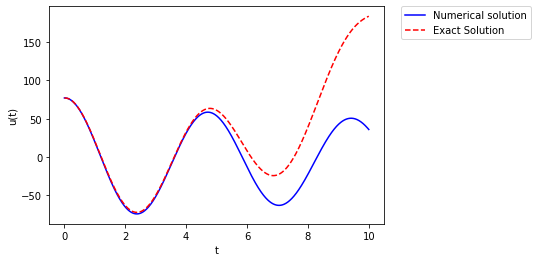

In [5]:
#-------------NOTE TO READER: This cell sometimes takes long to run. Refreshing the browser usually helps.------------------#

import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return (0.003*t**4 - 0.05*t**3 + 0.6*t**2 - 4*t)

def exact(t):
    return(np.exp(-0.05*t)*(77.2*np.cos(1.34*t)+ 5.32*np.sin(1.34*t)) + 0.0167*t**4-0.0281*t**3+0.327*t**2-2.16*t-0.243)
    
u = [77]
v = [1.1]
ex = [77]
x0 = 0
xN = 10
N = 1000
h = (xN - x0)/N

xF=np.linspace(x0,xN,N+1) 
XF=np.linspace(x0,xN-h,N)

for i in XF:
    ex.append(exact(i))
    u.append(u[-1] + h*v[-1])
    v.append((1-h*0.1)*v[-1] - (h*1.8*u[-2]) + (h*f(i)))
    
    

plt.plot(xF,u,'b', label="Numerical solution")
plt.plot(xF,ex,'--r', label="Exact Solution")


plt.xlabel('t') 
plt.ylabel('u(t)') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


To test our modelling prediction, let's assume an experiment was carried out that measured the displacement of the spring at 1001 time points over a ten second period. The code below generates some data to simulate this experiment and stores it in a variable called <code>data</code>.

In [6]:
import numpy as np
np.random.seed(ID)
Tt=np.linspace(0,10,1001)
TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10,0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8=TD/2,((-TD**2+4*TS)**0.5)/2,Ta/TS,-Tb/TS-4*Ta*TD/TS**2,Tc/TS+3*Tb*TD/TS**2+12*Ta*TD**2/TS**3-12*Ta/TS**2,-Td/TS+6*Tb/TS**2+48*Ta*TD/TS**3-2*Tc*TD/TS**2-6*Tb*TD**2/TS**3-24*Ta*TD**3/TS**4,Te/TS-2*Tc/TS**2-12*Tb*TD/TS**3-72*Ta*TD**2/TS**4+Td*TD/TS**2+24*Ta/TS**3+2*Tc*TD**2/TS**3+6*Tb*TD**3/TS**4+24*Ta*TD**4/TS**5
TA,TB=Tu0-Ta8,(Tv0+Ta1*Tu0-Ta1*Ta8-Ta7)/Ta2
Tu=np.exp(-Ta1*Tt)*(TA*np.cos(Ta2*Tt)+TB*np.sin(Ta2*Tt))+Ta4*Tt**4+Ta5*Tt**3+Ta6*Tt**2+Ta7*Tt+Ta8
Tu=Tu+np.random.normal(0,abs(max(Tu)-min(Tu))/10,1001)
data=np.transpose(np.array([Tt,Tu]))
del Tt,Tu,TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te,Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8

#### <span style="color: red"> Task 2:</span> Plot the numerical prediction made in Task 1 over the experimental data, plot the residuals showing the difference between the predicted solution and the experimental data and calculate the associated mean absolute error <span style="color: red"> (3 marks)</span>

If you did not manage to calculate a numerical prediction using the Euler Forward Method, you can use the exact solution instead.

#### Plot of prediction over experimental data:

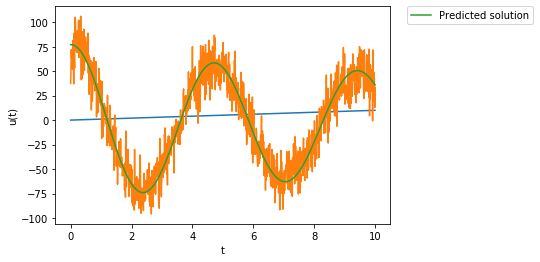

In [7]:
plt.plot(xF,data)
plt.plot(xF,u,label='Predicted solution')
plt.xlabel('t') 
plt.ylabel('u(t)') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend


#### Residual plot and mean absolute error:

The mean absolute error is 12.078215988453014


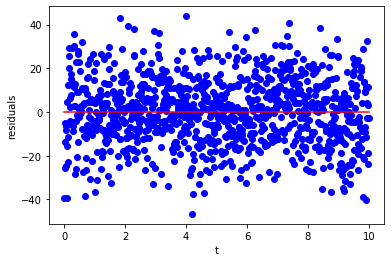

In [10]:
experiment = []
residuals = []
count = 0

while count < 1001:
    experiment.append(data[count][1])
    residuals.append(experiment[count]-u[count])
    count += 1
    
plt.plot(xF,residuals,'bo')
plt.plot(xF,[0.]*len(residuals),'-r')
plt.xlabel('t') 
plt.ylabel('residuals') 


residuals = np.array(residuals)
AbsErrors = abs(residuals)
MeanAbs = np.mean(AbsErrors)
print(f"The mean absolute error is {MeanAbs}")

#### <span style="color: red"> Task 3:</span> Analyse the residuals statistically<span style="color: red"> (6 marks)</span>

Plot the residuals as a histogram with 50 bins in relative frequency form, fit a normal distribution to them, plot it over the histogram, and report the _variance_ of the fitted distribution. Then use hypthesis testing to determine whether the residuals are normally distributed at the 5% significance level. Report the conclusion of the test as a sentence, giving the calculated p-value.

The fitted distribution parameters are mu = 0.133 and sigma = 15.2

The null hypothesis cannot be rejected
The test statistic = 0.7265882827841177 and the p-value = 0.6953818628250749


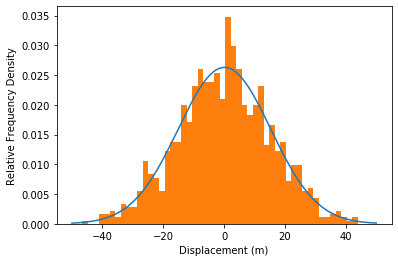

In [11]:
from scipy.stats import norm
from scipy.stats import normaltest


mu, sigma = norm.fit(residuals)
xNorm = np.linspace(-50,50,500)
plt.plot(xNorm, norm.pdf(xNorm,mu,sigma))
plt.hist(residuals,50,density=True)
plt.xlabel('Displacement (m)')
plt.ylabel('Relative Frequency Density'); 
print('The fitted distribution parameters are mu =',"%.3g" %mu,'and sigma =',"%.3g" %sigma)
print("")

k2, p = normaltest(residuals) 
alpha = 0.05
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("The test statistic =",k2,"and the p-value =",p)

#### <span style="color: red"> Task 4:</span> Solve the governing equation to determine the spring's displacement $u(t)$ using the Finite Element Method <span style="color: red"> (10 marks)</span>

We will now assume that we instead know both the initial displacement $u_0$ and the displacement after 1 second $u_1$, so that we have

$$u(0)=u_0,\hspace{0.5cm}\text{and}\hspace{0.5cm}u(1)=u_1,$$

and we want to calculate the displacement at an arbitrary time between 0 and 1 seconds.

The numerical values of $u_0$ and $u_1$ you should use are determined using your student ID number by the code below.

In [12]:
print('Please use u0 =',(ID % 100)-50,'and u1 =',(ID % 101)-50)

Please use u0 = 27 and u1 = -39


Compare your numerical solution to the exact solution, which for your $f(t)$ is generated by the code below, by plotting them both on the same set of axes over the time range from 0 to 1 seconds.

In [13]:
TD,TS,Tu0,Tu1,Ta,Tb,Tc,Td,Te,Tf=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 100)-50,(ID % 101)-50,0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19),1
Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8=TD/2,((-TD**2+4*TS)**0.5)/2,Ta/TS,-Tb/TS-4*Ta*TD/TS**2,Tc/TS+3*Tb*TD/TS**2+12*Ta*TD**2/TS**3-12*Ta/TS**2,-Td/TS+6*Tb/TS**2+48*Ta*TD/TS**3-2*Tc*TD/TS**2-6*Tb*TD**2/TS**3-24*Ta*TD**3/TS**4,Te/TS-2*Tc/TS**2-12*Tb*TD/TS**3-72*Ta*TD**2/TS**4+Td*TD/TS**2+24*Ta/TS**3+2*Tc*TD**2/TS**3+6*Tb*TD**3/TS**4+24*Ta*TD**4/TS**5
TA,TB=Tu0-Ta8,((-Ta8-Ta7*Tf-Ta6*Tf**2-Ta5*Tf**3-Ta4*Tf**4+Tu1)*np.exp(Ta1*Tf)+(Ta8-Tu0)*np.cos(Ta2*Tf))/np.sin(Ta2*Tf)
print('The exact solution to compare to is u(t) = e^(-',"%.3g" % Ta1,'t)(',"%.3g" % TA, 'cos(', "%.3g" % Ta2,'t)+',"%.3g" % TB, ' sin(',"%.3g" % Ta2,'t))',"%+.3g" % Ta4,'t^4',"%+.3g" % Ta5,'t^3',"+%.3g" % Ta6,'t^2',"%+.3g" % Ta7,'t',"%+.3g" % Ta8)
del TD,TS,Tu0,Tu1,Ta,Tb,Tc,Td,Te,Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8

The exact solution to compare to is u(t) = e^(- 0.05 t)( 27.2 cos( 1.34 t)+ -46.2  sin( 1.34 t)) +0.00167 t^4 -0.0281 t^3 +0.327 t^2 -2.16 t -0.243


Calculate expressions for the residuals, $r_k$, and the Jacobian, $J_{kj}$, and write them in the Markdown cell below using LaTeX to ensure your mathematics is formatted correctly.

Use linear finite element shape functions, 12 nodal points and enter your answer into the code cell below.

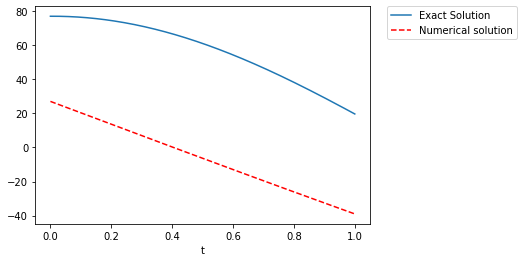

In [18]:
import scipy.integrate as integrate
def LFESF(x,j,N): 
    Xj=(j-1)/(N-1) 
    Xjminus=(j-2)/(N-1) 
    Xjplus=j/(N-1) 
    if x<Xjminus:
        output=0.0
    else:
        if x<Xj:
            output=(x-Xjminus)/(Xj-Xjminus)
        else:
            if x<Xjplus:
                output=(Xjplus-x)/(Xjplus-Xj)
            else:
                output=0.0
    return output

def LFESFVector(x,j,N):
    output=np.zeros(len(x))
    for xj in range(len(x)): 
        output[xj]=LFESF(x[xj],j,N)
    return output

def DLFESF(x,j,N): 
    Xj=(j-1)/(N-1) 
    Xjminus=(j-2)/(N-1) 
    Xjplus=j/(N-1) 
    if x<Xjminus:
        output=0.0
    else:
        if x<Xj:
            output=1/(Xj-Xjminus)
        else:
            if x<Xjplus:
                output=-1/(Xjplus-Xj)
            else:
                output=0.0
    return output

def DLFESFVector(x,j,N): 
    output=np.zeros(len(x))
    for xj in range(len(x)): 
        output[xj]=DLFESF(x[xj],j,N)
    return output

#Step 1

N=12 #the number of nodal points is 12

#Step 2:
U=np.ones(N-2)

#Step 3:
g0=27 
g1=-39 

def up(x):
    output=g0*LFESF(x,1,N)+g1*LFESF(x,N,N) 
    return output

def Dup(x): 
    output=g0*DLFESF(x,1,N)+g1*DLFESF(x,N,N) 
    return output

def uh(x,U):  
    output=np.zeros(len(x)) 
    LFESFList=np.zeros(len(U)) 
    for xj in range(len(x)):
        for k in range(len(U)):
            LFESFList[k]=LFESF(x[xj],k+2,N)
        output[xj]=sum(U*LFESFList) 
    return output 

#Set up while loop
tol=0.0000000001 #the tolerance is 0.0000001
maxres=tol+1 
while (maxres>tol):

#Step 4:
    r=np.zeros(N-2)
    myint=np.zeros(N-2)
    Nrange=range(N-2)
    for k in Nrange: 
        for j in Nrange: 
            myint[j]=integrate.quad(lambda x: U[j]*DLFESF(x,j+2,N)*DLFESF(x,k+2,N),0,1,limit=100)[0]
        r[k]=-(integrate.quad(lambda x: Dup(x)*DLFESF(x,k+2,N),0,1,limit=100)[0]+sum(myint)+integrate.quad(lambda x: 6*x*LFESF(x,k+2,N),0,1,limit=100)[0]) 
    maxres=max(abs(r))

#Step 5:    
    J=np.zeros((N-2,N-2))
    for j in range(N-2): 
        for k in range(N-2): 
            J[k,j]=-integrate.quad(lambda x: DLFESF(x,j+2,N)*DLFESF(x,k+2,N),0,1,limit=100)[0]
    deltaU=np.linalg.solve(J,-r)
        
#Step 6:        
    U=U+deltaU
    
#Step 7:  
def FinalU(x,U):
    output=np.zeros(len(x))
    LFESFList=np.zeros(len(U))
    for xj in range(len(x)): 
        for k in range(len(U)): 
             LFESFList[k]=LFESF(x[xj],k+2,N)
        output[xj]=up(x[xj])+sum(U*LFESFList)
    return output

t=np.linspace(0,1,301)


plt.plot(t,np.exp(-0.05*t)*(77.2*np.cos(1.34*t)+ 5.32*np.sin(1.34*t)) + 0.0167*t**4-0.0281*t**3+0.327*t**2-2.16*t-0.243, label = "Exact Solution") #plot f(x)=x^3-2x+300
plt.plot(t,FinalU(t,U),'--r', label="Numerical solution") #plot numerical solution
plt.xlabel('t') #label horizontal axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend


### For use by markers only:

#### Total mark: $\hspace{1cm}$/30

#### As a percentage: